# Big Ideas Project - Safety Squad
## Introduction: 


## The Metric:

### Data Set 1: Pittsburgh Police Arrest Data

Central Business District      4440
South Side Flats               3497
Carrick                        2351
East Allegheny                 2217
Homewood South                 2090
Homewood North                 1969
East Liberty                   1889
Marshall-Shadeland             1516
Bluff                          1502
Mount Washington               1434
Hazelwood                      1396
Brookline                      1390
Lincoln-Lemington-Belmar       1362
Knoxville                      1336
Sheraden                       1285
Allegheny Center               1244
Beechview                      1201
East Hills                     1194
Brighton Heights               1114
Perry South                    1057
Bloomfield                      984
Shadyside                       971
Allentown                       947
Middle Hill                     932
Larimer                         879
Central North Side              853
Crawford-Roberts                839
North Shore                 

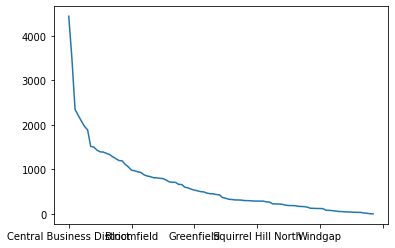

In [4]:
import pandas as pd
import pprint
%matplotlib inline

arrests = pd.read_csv("arrests.tsv", sep="\t")
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts()
pd.set_option('display.max_rows', None)
print(neighborhood_counts)
neighborhood_counts.plot()

                 Neighborhood  2020_Total_Population
66                  Shadyside                  15317
75        Squirrel Hill South                  15317
12                  Brookline                  13063
74        Squirrel Hill North                  11879
54              North Oakland                  10691
14                    Carrick                  10290
51           Mount Washington                   8710
8                  Bloomfield                   8665
6                   Beechview                   7596
70           South Side Flats                   7467
35                 Greenfield                   7261
11           Brighton Heights                   7105
38              Highland Park                   6235
27               East Liberty                   6187
9                       Bluff                   5882
18            Central Oakland                   5835
15  Central Business District                   5477
61               Point Breeze                 

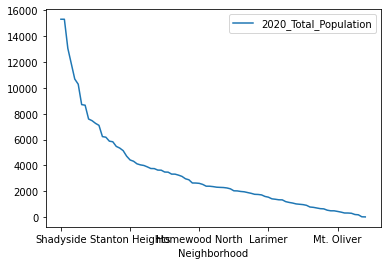

In [5]:
population = pd.read_csv("population.tsv", sep="\t")

population['Neighborhood'] = population['Neighborhood'].replace("Arlington - Arlington Heights (Combined)", "Arlington")
population['Neighborhood'] = population['Neighborhood'].replace("Central Business District (Downtown)", "Central Business District")
population['Neighborhood'] = population['Neighborhood'].replace("Spring Hill-City", "Spring Hill-City View")

pop_data = population[['Neighborhood','2020_Total_Population']]
pop_data = pop_data.sort_values(by = '2020_Total_Population', ascending=False)

print(pop_data)
pop_data.plot(x='Neighborhood', y='2020_Total_Population')

                 Neighborhood  Arrests_Per_Capita
20                    Chateau           23.894737
69                South Shore           10.379310
55                North Shore            2.704319
85                   West End            1.414634
41              Homewood West            1.190031
24             East Allegheny            1.165003
40             Homewood South            0.924779
0            Allegheny Center            0.876674
15  Central Business District            0.810663
39             Homewood North            0.752388
31                   Fineview            0.698246
29                     Esplen            0.621118
43                    Larimer            0.568932
49                Middle Hill            0.530450
5           Bedford Dwellings            0.479798
70           South Side Flats            0.468327
13       California-Kirkbride            0.444288
26                 East Hills            0.412863
2                   Allentown            0.410846


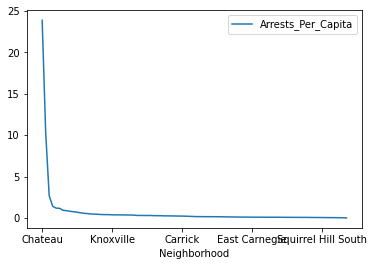

In [6]:
merged_data = pd.merge(neighborhood_counts, pop_data, how='inner', left_index= True, right_on='Neighborhood')
merged_data['Arrests_Per_Capita'] = merged_data['INCIDENTNEIGHBORHOOD'] / merged_data['2020_Total_Population']
merged_data = merged_data.sort_values(by='Arrests_Per_Capita', ascending=False)
print(merged_data[['Neighborhood', 'Arrests_Per_Capita']])
merged_data[['Neighborhood', 'Arrests_Per_Capita']].set_index('Neighborhood').plot()

### Data Set 2 : Pittsburgh Police Firearm Seizures Data

In [14]:
import pandas as pd

firearms_df = pd.read_csv("firearms.tsv", sep="\t")
firearms_count_per_neighborhood = firearms_df['neighborhood'].value_counts().reset_index()
firearms_count_per_neighborhood.columns = ['Neighborhood', 'Firearms Seized']

firearms_seized_df = firearms_count_per_neighborhood.copy().sort_values(by='Neighborhood', ascending=True)

population_df = pd.read_csv("population.tsv", sep="\t")

# Fix different names for neighborhoods
population_df['Neighborhood'] = population_df['Neighborhood'].replace("Arlington - Arlington Heights (Combined)", "Arlington")
population_df['Neighborhood'] = population_df['Neighborhood'].replace("Central Business District (Downtown)", "Central Business District")
population_df['Neighborhood'] = population_df['Neighborhood'].replace("Spring Hill-City", "Spring Hill-City View")

neighborhood_pop = population_df[["Neighborhood", "2020_Total_Population"]]

# Merge the population information by neighborhood
firearms_seized_with_pop = pd.merge(firearms_seized_df, neighborhood_pop, on="Neighborhood", how="left")

# Fix differences between neighborhood distinctions
firearms_seized_with_pop['Neighborhood'] = firearms_seized_with_pop['Neighborhood'].replace("Mount Oliver Borough", "Mt. Oliver")
firearms_seized_with_pop['Neighborhood'] = firearms_seized_with_pop['Neighborhood'].replace("Arlington Heights", "Arlington")
firearms_seized_with_pop = firearms_seized_with_pop.groupby('Neighborhood').sum().reset_index()


In [15]:
# array to store the percentages
percentages = []

for index, row in firearms_seized_with_pop.iterrows():
    neighborhood = row['Neighborhood']
    total_population = row['2020_Total_Population']
    
    # Exclude 'Neighborhood' and '2020_Total_Population' columns
    columns_to_exclude = ['Neighborhood', '2020_Total_Population']
    row_data = row.drop(labels=columns_to_exclude)
    
    # Calculate and print percentages
    print(f"{neighborhood}")
    for column_name, column_value in row_data.iteritems():
        percentage = (column_value / total_population) * 100
        print(f"Percentage of Firearms Seized: {percentage:.2f}%")
    print()  

Allegheny Center
Percentage of Firearms Seized: 1.13%

Allegheny West
Percentage of Firearms Seized: 2.96%

Allentown
Percentage of Firearms Seized: 2.91%

Arlington
Percentage of Firearms Seized: 1.76%

Banksville
Percentage of Firearms Seized: 0.24%

Bedford Dwellings
Percentage of Firearms Seized: 4.98%

Beechview
Percentage of Firearms Seized: 0.86%

Beltzhoover
Percentage of Firearms Seized: 2.68%

Bloomfield
Percentage of Firearms Seized: 0.44%

Bluff
Percentage of Firearms Seized: 0.85%

Bon Air
Percentage of Firearms Seized: 1.05%

Brighton Heights
Percentage of Firearms Seized: 1.15%

Brookline
Percentage of Firearms Seized: 0.39%

California-Kirkbride
Percentage of Firearms Seized: 4.09%

Carrick
Percentage of Firearms Seized: 1.14%

Central Business District
Percentage of Firearms Seized: 2.04%

Central Lawrenceville
Percentage of Firearms Seized: 0.49%

Central Northside
Percentage of Firearms Seized: 1.99%

Central Oakland
Percentage of Firearms Seized: 0.27%

Chartiers Ci

In [16]:
# Dictionary to store percentages with neighborhoods
percentages_with_neighborhood = {} 

for index, row in firearms_seized_with_pop.iterrows():
    neighborhood = row['Neighborhood']
    total_population = row['2020_Total_Population']
    
    # Exclude 'Neighborhood' and '2020_Total_Population' columns
    columns_to_exclude = ['Neighborhood', '2020_Total_Population']
    row_data = row.drop(labels=columns_to_exclude)
    
    # Calculate and store percentages
    neighborhood_percentages = {}
    for column_name, column_value in row_data.iteritems():
        percentage = (column_value / total_population) * 100
        neighborhood_percentages[column_name] = percentage
    
    percentages_with_neighborhood[neighborhood] = neighborhood_percentages

In [17]:
# Sort the dictionary
sorted_percentages = sorted(percentages_with_neighborhood.items(), key=lambda x: max(x[1].values()))

# Print the bottom 10 neighborhoods
print("10 neighborhoods with lowest percents of seized firearms per capita:")
n = 1
print()
for neighborhood, percentages in sorted_percentages[:10]:
    lowest_percentage = min(percentages.values())
    print(n, f"{neighborhood}: {lowest_percentage:.2f}%")
    n+=1

10 neighborhoods with lowest percents of seized firearms per capita:

1 Swisshelm Park: 0.07%
2 Squirrel Hill North: 0.08%
3 North Oakland: 0.14%
4 Friendship: 0.15%
5 Shadyside: 0.16%
6 Summer Hill: 0.20%
7 Squirrel Hill South: 0.22%
8 Banksville: 0.24%
9 Lincoln Place: 0.25%
10 Central Oakland: 0.27%


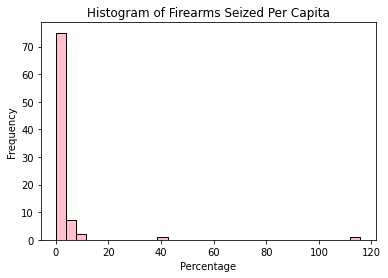

In [18]:
import matplotlib.pyplot as plt

# Extract percentages
column_name = 'Firearms Seized'
percentages = [value[column_name] for value in percentages_with_neighborhood.values()]

# Create the histogram
plt.hist(percentages, bins=30, color='pink', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name} Per Capita')
plt.show()

### Data Set 3 : Pittsburgh Speed Humps Data

           neighborhood  number of speedhumps
0   Squirrel Hill South                    18
1               Carrick                     9
2           Polish Hill                     6
3         North Oakland                     6
4            Upper Hill                     4
5             Brookline                     4
6        Homewood South                     4
7     South Side Slopes                     4
8           Perry North                     4
9              Garfield                     3
10  Squirrel Hill North                     3
11     South Side Flats                     3
12     Mount Washington                     3
13           Bloomfield                     3
14        Highland Park                     2
15      Central Oakland                     1
16      Stanton Heights                     1
17            Overbrook                     1


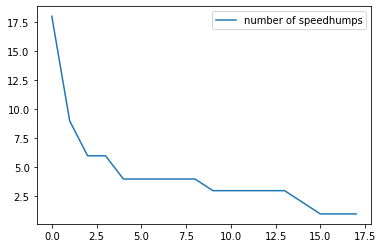

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv file into fire dataframe
speedbumps_raw = pd.read_csv("speedbumps.csv", sep=",")
headcounts_raw = pd.read_csv("headcount.csv", sep = ",")

# was getting an error because there are missing neighborhoods in some rows. clean data by removing those
#fire = fire_raw.dropna(subset=['neighborhood'])

speedbumps = speedbumps_raw[['neighborhood']].copy()

# Count how many times each neighborhood shows up
speed_df = speedbumps['neighborhood'].value_counts()
speed_df = speed_df.reset_index()
speed_df.columns = ['neighborhood', 'number of speedhumps']

#create dataframe headcounts and rename cols to match up with naming convention
headcount_df = headcounts_raw[["Neighborhood", "2020_Total_Population"]]

headcount_df = headcount_df.rename(columns={'Neighborhood': 'neighborhood'})

print(speed_df)
speed_df.plot()


           neighborhood  percent speedbumps per capita
2           Polish Hill                       0.499584
4            Upper Hill                       0.232153
6        Homewood South                       0.176991
0   Squirrel Hill South                       0.117516
8           Perry North                       0.106440
7     South Side Slopes                       0.092443
1               Carrick                       0.087464
9              Garfield                       0.082350
3         North Oakland                       0.056122
11     South Side Flats                       0.040177
13           Bloomfield                       0.034622
12     Mount Washington                       0.034443
14        Highland Park                       0.032077
5             Brookline                       0.030621
17            Overbrook                       0.028711
10  Squirrel Hill North                       0.025255
16      Stanton Heights                       0.022589
15      Ce

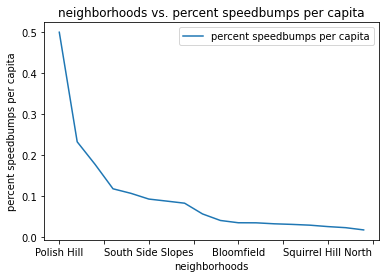

In [20]:
import matplotlib.pyplot as plt

#merge with headcounts 
total_df = pd.merge(speed_df, headcount_df, on='neighborhood', how = 'left')


#number of speed bumps divided by population in each area
#divide 2020_total_population / number of speedbumps
total_df['percent speedbumps per capita'] =  (total_df['number of speedhumps'] / total_df['2020_Total_Population'])*100

#descending order of speedbumps_per_capita
total_df = total_df.sort_values(by='percent speedbumps per capita', ascending=False)

#print out neighborhoods and their speedbumps_per_capita
print(total_df[['neighborhood', 'percent speedbumps per capita']])

#make a graph of neighborhoods vs speedbumps per capita
plot = total_df.plot(x='neighborhood', y='percent speedbumps per capita', kind='line', title='neighborhoods vs. percent speedbumps per capita')
plt.ylabel('percent speedbumps per capita')
plt.xlabel('neighborhoods')
plt.show()

## The Best Neighborhood:

## Conclusion: